In [3]:
#Instalando o ipykernel
#pip install ipykernel

In [4]:
#Instalando o matplotlib
#pip install matplotlib

In [5]:
#Inportando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime #importa a biblioteca para puxar o tempo

In [9]:
#Cria a variável df para guardar o data frame
df = pd.read_csv("https://raw.githubusercontent.com/danielvieira95/Inteligencia_Artificial_2025/refs/heads/main/bases_de_dados/monitoramento_tempo.csv")

In [ ]:
#Mostra as primeiras 4 linhas do Data frame
df.head()

In [ ]:
#Exibe as ultimas 4 linhas
df.tail()

In [ ]:
df["data"] = pd.to_datetime(df['data']) #Conversão da coluna data para datetime 64

In [ ]:
df.info() #Exibe as informações da base de dados

In [ ]:
plt.plot(df["data"], df["temperatura"]) #plota o gráico temperatura x data

In [ ]:
# criando codigo para plotar um gráfico  dentro do outro

fig = plt.figure(figsize=(12,5)) # cria o tamanho da figura
eixo = fig.add_axes([0,0,1,1]) # cria os eixos da figura
eixo.set_ylim(200,500) # define limites do grafico
eixo.plot(df['data'],df['temperatura'],color='b') # plota o gráfico
eixo.grid(True) # ativa a grade do gráfico
#definindo o período do grafico
eixo.set_xlim(datetime.datetime(2014,5,1),datetime.datetime(2014,6,1)) # define o período do grafico
eixo.set_title('Temperatura no momento',fontsize=25,pad=20) #titulo do grafico
eixo.set_xlabel('Ano',fontsize=20) # titulo do eixo x
eixo.set_ylabel('Temperatura',fontsize=20) # titulo do eixo y
eixo.legend() # exibe a legenda


# criando o eixo 2  dentro do grafico
eixo2= fig.add_axes([0.35,0.50,0.5,0.3]) # cria o eixo 2 para o gráfico

#definindo um espaçamento de tick a cada 7 dias

eixo2.xaxis.set_major_locator(mdates.DayLocator(interval=7)) #definindo o intervalo do eixo x
eixo2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b')) # formataçao da data exibindo o mes e o dia
# definindo o período do gráfico desejado
eixo2.set_xlim(datetime.datetime(2015,4,1),datetime.datetime(2015,5,1)) 
eixo2.tick_params(axis='x',labelsize=8) # espaçamento do eixo x
eixo2.plot(df['data'],df['temperatura'],color='r') # plotando o grafico de temperatura
eixo2.tick_params(axis='x',labelsize=8) # espaçamento do eixo x
eixo2.grid(True) # ativa a grade do gráfico
eixo2.set_title('Temperatura x ano',fontsize=15) # titulo do gráfico
eixo2.set_ylabel('Temperatura',fontsize=20) # titulo do eixo y
eixo2.set_xlabel('Ano',fontsize=20) # titulo do eixo x
eixo2.legend(['temperatura'],loc='best',fontsize=10) # ativa a legenda do gráfico

In [ ]:
fig =plt.figure(figsize=(15,8)) # cria o tamanho da figura
plt.rcParams['font.size']='10' # fonte da figura
eixo = fig.add_axes([0,0,1,1]) # cria o eixo 1
eixo.set_ylim(200,500) # define limite do eixo y
eixo2 = fig.add_axes([0.65,0.58,0.3,0.3]) # cria o eixo 2
eixo.plot(df['data'],df['temperatura'],color='b')
eixo.grid(True)

# definindo o periodo do grafico
eixo.set_xlim(datetime.datetime(2014,5,1),datetime.datetime(2014,6,1))
eixo.set_title('Temperatura no momento',fontsize=20)
eixo.set_ylabel('Temperatura',fontsize=20)
eixo.set_xlabel('Ano',fontsize=20)
eixo.legend(['temperatura'],loc='best')
azul_esquerda=df['data']<datetime.datetime(2014,5,1) # armazena o periodo
azul_direita = df['data']>datetime.datetime(2014,6,1) 

#eixo 2
eixo2.set_xlim(datetime.datetime(2014,1,1),datetime.datetime(2015,1,1))
eixo2.plot(df['data'],df['temperatura'],color='r')
eixo2.plot(df[azul_esquerda]['data'],df[azul_esquerda]['temperatura'],color='b')
eixo2.plot(df[azul_direita]['data'],df[azul_direita]['temperatura'],color='b')
eixo2.grid(True)
eixo2.set_title('Temperatura - 05/2014',fontsize=15)
eixo2.set_ylabel('Temperatura',fontsize=15)
eixo2.set_xlabel('Mês',fontsize=15)
eixo2.legend(['temperatura'],loc='best',fontsize=10)

Text(2016-10-16 08:00:00, 307.52, 'Máximo')

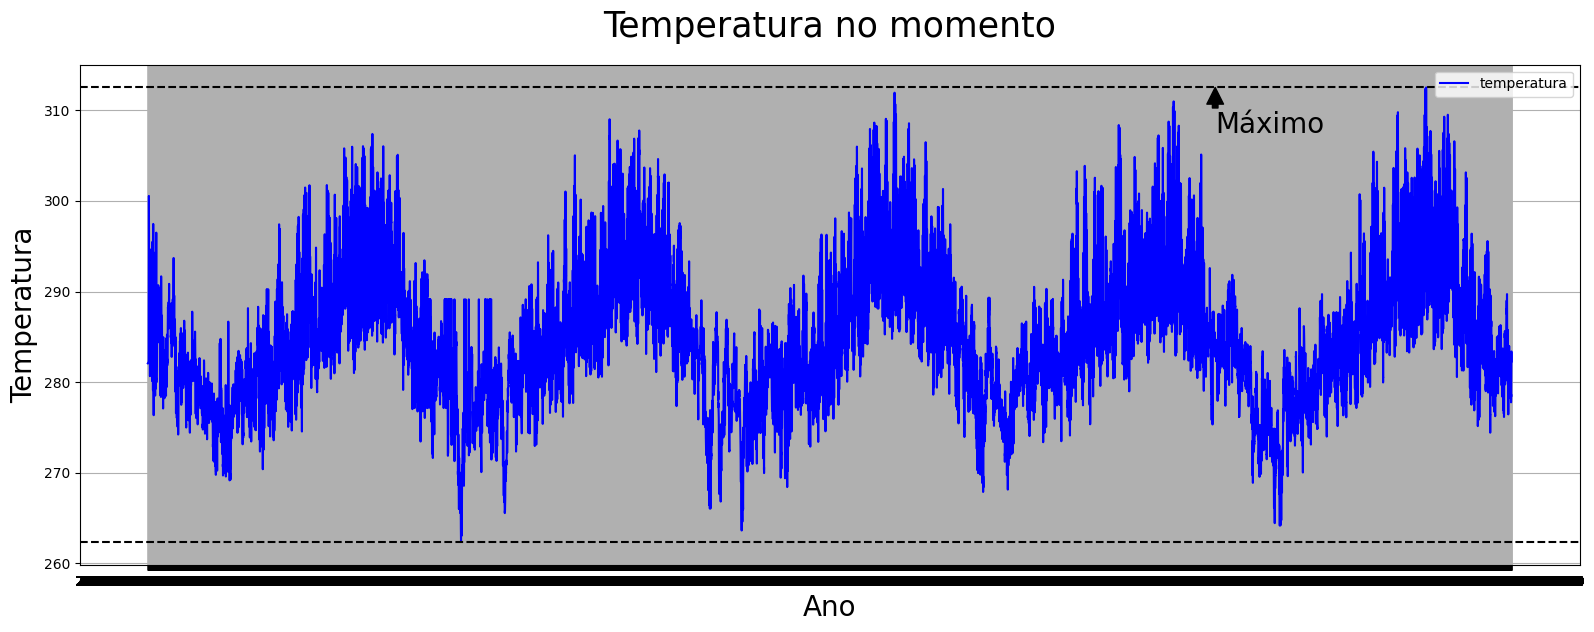

In [11]:
# realizando anotações no gráfico

fig = plt.figure(figsize=(15,5))
eixo = fig.add_axes([0,0,1,1])
eixo.plot(df['data'],df['temperatura'],color='b')
eixo.grid(True)
eixo.set_title('Temperatura no momento',fontsize=25,pad=20)
eixo.set_ylabel('Temperatura',fontsize=20)
eixo.set_xlabel('Ano',fontsize=20)
eixo.legend(['temperatura'],loc='best')
# fazendo as maracações no gráfico
eixo.axhline(max(df['temperatura']),color='k',linestyle='--')
eixo.axhline(min(df['temperatura']),color='k',linestyle='--')

# armazenando valores em x1
x1 = df['data'][df['temperatura'].idxmax()] # armazena a posição em x1
y1 = max(df['temperatura']) # armazena em y1 o valor da temperatura
x2 = x1=df['data'][df['temperatura'].idxmax()-7000]
y2 = max(df['temperatura'])-5 # armazena a posição em y2

# função para fazer anotação no grafico
eixo.annotate('Máximo',xy=(x1,y1),fontsize=20,xytext=(x2,y2),arrowprops=dict(facecolor='k'))

# anotação valor minimo
x1 = df['data'][df['temperatura'].idxmin()] # anota o valor minimo
y1 = min(df['temperatura']) # armazena o valor minimo de temperatura
x2= x1 = df['data'][df['temperatura'].idxmin()-7000] 
y2 = min(df['temperatura'])+5 
eixo.annotate('Mínimo',xy=(x1,y1),fontsize=20,xytext=(x2,y2),arrowprops=dict(facecolor='k'))

In [ ]:
# gráfico de barras

temperatura_dia_semana = df.groupby('dia_da_semana')['temperatura'].mean() # calcula a temperatura media
temperatura_dia_semana
nome_dia=['Domingo','Segunda','Terça','Quarta','Quinta','Sexta','Sábado'] # cria uma lista para os dias da semana
temperatura_dia_semana=temperatura_dia_semana[nome_dia] # atribui a minha lista a variavel
# temperatura dia da semana
fig = plt.figure(figsize=(5,4)) # cria a variavel fig para armazenar o tamanho da figura
eixo = fig.add_axes([0,0,1,1]) # cria o eixo do gráfico
indice = range(len(temperatura_dia_semana)) # verifica o tamanho da lista
# eixo.bar cria o gráfico de barras
eixo.bar(indice,temperatura_dia_semana)
eixo.set_title('Temperatura por dia da semana',fontsize=15,pad=10)
eixo.set_xlabel('Dia da semana',fontsize=15)
eixo.set_ylabel('Temperatura média',fontsize=15)
eixo.set_xticks(indice) # coloca o indice no eixo x
eixo.set_xticklabels(nome_dia)